In [1]:
# Financial Data ML Model (2015–2018)
# Author: Mariam Mumtaz (02-134212-049)

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [3]:
#  Load the CSVs (Make sure they are in the same folder as the notebook)
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")
df_2017 = pd.read_csv("2017_Financial_Data.csv")
df_2018 = pd.read_csv("2018_Financial_Data.csv")

#  Add Year column
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

#  Combine all years into one dataframe
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018], ignore_index=True)
print("Combined dataset shape:", df_all.shape)


Combined dataset shape: (18269, 229)


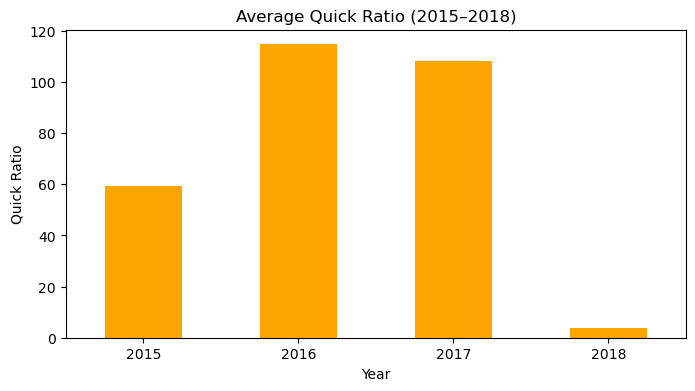

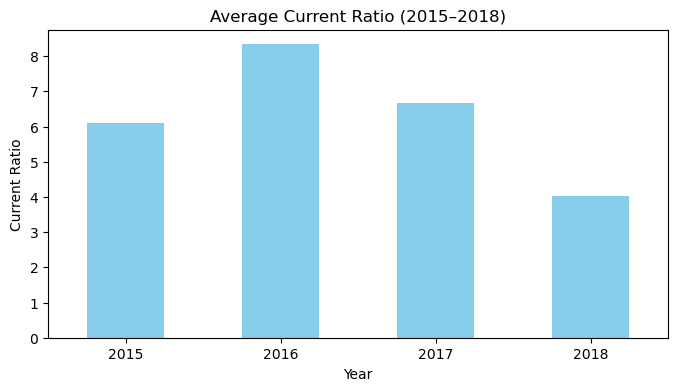

In [5]:
# ✅ Fill missing values temporarily for plotting
df_all.fillna(0, inplace=True)

# ✅ Plot average quick ratio over years
plt.figure(figsize=(8, 4))
df_all.groupby('Year')['quickRatio'].mean().plot(kind='bar', color='orange')
plt.title('Average Quick Ratio (2015–2018)')
plt.ylabel('Quick Ratio')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.show()

# ✅ Plot average current ratio over years
plt.figure(figsize=(8, 4))
df_all.groupby('Year')['currentRatio'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Current Ratio (2015–2018)')
plt.ylabel('Current Ratio')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.show()

In [7]:
#  Keep only numeric columns
df_model = df_all.select_dtypes(include=[np.number])

#  Remove rows with missing target (Class)
df_model = df_model[df_model['Class'].notna()]

#  Check class distribution
print("Class distribution:\n", df_model['Class'].value_counts())

#  Split into features and target
X = df_model.drop(['Class'], axis=1)
y = df_model['Class']

#  Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#  Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#  Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Class distribution:
 Class
1    10525
0     7744
Name: count, dtype: int64


In [9]:
#  Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

#  KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
Confusion Matrix:
 [[1519  804]
 [  50 3108]]
Accuracy: 0.8441890166028098
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78      2323
           1       0.79      0.98      0.88      3158

    accuracy                           0.84      5481
   macro avg       0.88      0.82      0.83      5481
weighted avg       0.87      0.84      0.84      5481


--- KNN Classifier ---
Confusion Matrix:
 [[1434  889]
 [ 621 2537]]
Accuracy: 0.7245028279511038
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66      2323
           1       0.74      0.80      0.77      3158

    accuracy                           0.72      5481
   macro avg       0.72      0.71      0.71      5481
weighted avg       0.72      0.72      0.72      5481



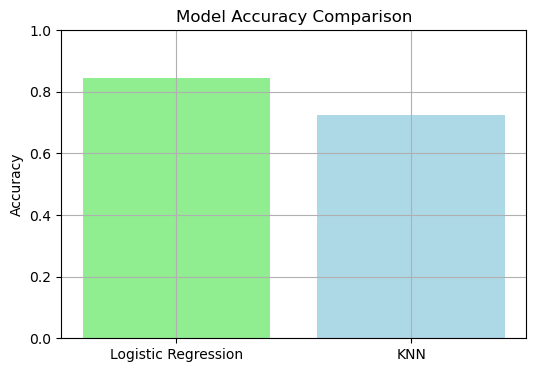

In [11]:
#  Logistic Regression Results
print("\n--- Logistic Regression ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

#  KNN Results
print("\n--- KNN Classifier ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

#  Accuracy Comparison Plot
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression', 'KNN'], 
        [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn)],
        color=['lightgreen', 'lightblue'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()